# Team Members
| Name            | ID       |
| :---            | :---     |
| Somaya Mohammed | 20200234 |
| Dina Ahmed      | 20201061 |
| Eman Ibrahim    | 20201038 |
| Mariem Shehab   | 20200844 |
| Norhan Sayed    | 20201200 |

## (1) Objectives:
• Acquire proficiency in using the Tensorflow framework and the Scikit-Learn library.
<br>
• Familiarize yourself with Artificial Neural Networks (ANNs) and K-NearestNeighbors (K-NN).
<br>
• Attain a comprehension of the concept of hyperparameter tuning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## (2) Approaching the project:

### (a) Data Exploration and preparation:
• Load the dataset and perform initial data exploration.
<br>
• Begin by familiarizing yourself with the dataset.
<br>
• Identify the number of unique classes.
<br>
• Identify the number of features.
<br>
• Check for missing values.
<br>
• Normalize each image by dividing each pixel by 255.
<br>
• Resize images to dimensions of 28 by 28. After resizing, visualize some images to verify the correctness of the reshaping process.
<br>
• Split the training data (mnist_train) into training and validation sets.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset and perform initial data exploration.
mnist_train = pd.read_csv('drive/MyDrive/Colab Notebooks/mnist_train.csv')
mnist_test = pd.read_csv('drive/MyDrive/Colab Notebooks/mnist_test.csv')

In [ ]:
mnist_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mnist_test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Begin by familiarizing yourself with the dataset.
mnist_train.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [ ]:
mnist_train.shape

(60000, 785)

In [ ]:
mnist_test.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,4.443400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,2.895865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mnist_test.shape

(10000, 785)

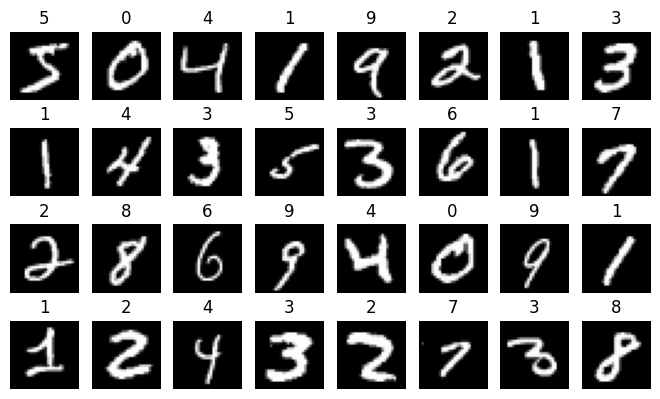

In [ ]:
plt.subplots_adjust(left = 0, right = 1)
for index in range(4*8):
    plt.subplot(4, 8, index + 1)
    #Resize images to dimensions of 28 by 28
    plt.title(mnist_train['label'].iloc[index])
    plt.imshow(mnist_train.drop(columns = ['label']).iloc[index].values.reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Identify the number of unique classes.
unique_classes = np.unique(mnist_train['label'])
print(f'number of unique classes in the mnist dataset: {len(unique_classes)}')
print(f'Unique calsses: {unique_classes}')

number of unique classes in the mnist dataset: 10
Unique calsses: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Identify the number of features.
num_features_train = mnist_train.drop(columns = ['label']).shape[1]
num_features_test = mnist_test.drop(columns = ['label']).shape[1]

print(f'Number of features of trian data : {num_features_train}')
print(f'Number of features of test data : {num_features_test}')

Number of features of trian data : 784
Number of features of test data : 784


In [ ]:
# Check for missing values.
# checking null values in the train data
print(f'Num of null values in train data : \n{mnist_train.isnull().sum()}\nTotal nulls = {mnist_train.isnull().sum().sum()}')

# checking null values in the test data
print(f'Num of null values in test data : \n{mnist_test.isnull().sum()}\nTotal nulls = {mnist_test.isnull().sum().sum()}')

Num of null values in train data : 
label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64
Total nulls = 0
Num of null values in test data : 
label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64
Total nulls = 0


In [ ]:
# Split the features and target of training data (mnist_train)
X_train = mnist_train.drop(columns = ['label'])
y_train = mnist_train["label"]
print(X_train.shape, y_train.shape)

# Split the features and target of testing data (mnist_test)
X_test = mnist_test.drop(columns = ['label'])
y_test = mnist_test["label"]
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
# Normalize each image by dividing each pixel by 255.
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000786,0.000348,0.000179,0.000076,0.000059,0.000008,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023696,0.015514,0.011137,0.006615,0.006582,0.001359,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


In [ ]:
X_test.describe()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000703,0.000642,0.000206,0.000002,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022252,0.022494,0.009490,0.000235,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992157,0.992157,0.611765,0.023529,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Resize images to dimensions of 28 by 28. After resizing, visualize some images to verify the
# correctness of the reshaping process.
X_train = X_train.to_numpy().reshape((-1, 28, 28))
X_test = X_test.to_numpy().reshape((-1, 28, 28))
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

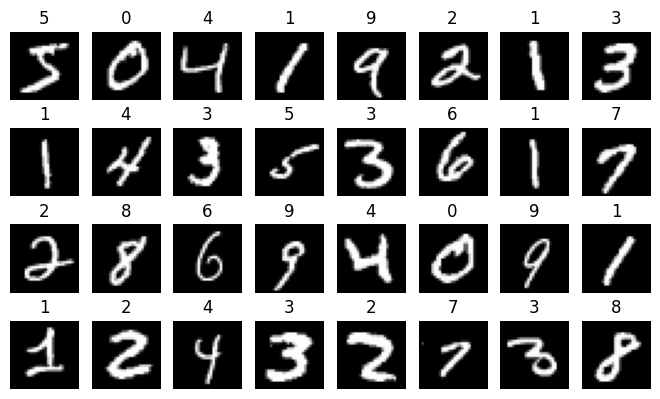

In [ ]:
# check if split correctly by print
plt.subplots_adjust(left = 0, right = 1)
for i in range(4*8):
    plt.subplot(4, 8, i + 1)
    plt.title(y_train[i])
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Split the training data (mnist_train) into training and validation sets.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.8, random_state=0)
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28), (48000,), (12000, 28, 28), (12000,))

## (b) Experiments and results:
### Initial Experiment:
Implement the K-NN algorithm for classification and utilize a grid search technique to determine the optimal hyper
parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# determining hyper parameters tuning to select the best of it.
grid_param = {
    'n_neighbors':[3, 5],
    'weights': ['uniform', 'distance'],
}
# apply grid search algorithm to get the optimal hyper parameters.
grid_search = GridSearchCV(KNeighborsClassifier(), # estimator 'KNN'
                           grid_param,
                           cv = 3, # cross validation (k-fold = 3)
                           scoring = 'accuracy',
                           n_jobs = -1, # use all processors to run in parallel
                           verbose = 4, # determines how much information is displayed
                           error_score='raise') # raise error if happen during fit the model

In [ ]:
# fit the model with only 2D data
grid_search.fit(X_train.reshape(-1, 28*28), y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
             n_jobs=-1,
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=4)

In [ ]:
# best parameters selected by grid search
best_params = grid_search.best_params_
best_params

{'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
# build KNN model with optimal hyper parameters
knn_model = KNeighborsClassifier(**best_params)
knn_model.fit(X_train.reshape(-1, 28*28), y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
# predict y to calculate the accuracy of the knn model.
y_predict = knn_model.predict(X_validation.reshape(-1, 28*28))
knn_acc = accuracy_score(y_validation, y_predict)
print(f'Accuracy of the KNN model based on validation dataset: {float("{:.3f}".format(knn_acc*100))}%')

Accuracy of the KNN model based on validation dataset: 97.425%


### Subsequent Experiment:
Construct and train two different architectures of Artificial Neural Network (ANN) for classification, exploring variations in
the number of hidden neurons, learning rate, and batch size.

In [ ]:
from tensorflow import keras

In [ ]:
# build the first model
def build_ann_model_1(input_shape, num_hidden_neurons=128, learning_rate=0.01):
  ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(num_hidden_neurons, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
  ])
  ann_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                    loss=keras.losses.SparseCategoricalCrossentropy(),
                    metrics=['accuracy'])

  return ann_model

In [ ]:
# bulid the first model with number of hidden neurons equals 256
ann_model_1 = build_ann_model_1(input_shape=(28, 28), num_hidden_neurons=256, learning_rate=0.001)
# fit the first model
ann_model_1.fit(X_train, y_train,
                batch_size=32,
                epochs=10,
                validation_data=(X_validation, y_validation))

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2499 - accuracy: 0.9278 - val_loss: 0.1343 - val_accuracy: 0.9601
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1059 - accuracy: 0.9689 - val_loss: 0.0954 - val_accuracy: 0.9718
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0692 - accuracy: 0.9789 - val_loss: 0.0800 - val_accuracy: 0.9750
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0505 - accuracy: 0.9842 - val_loss: 0.0776 - val_accuracy: 0.9751
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0358 - accuracy: 0.9891 - val_loss: 0.0739 - val_accuracy: 0.9779
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0714 - val_accuracy: 0.9779
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0771 - val_accuracy:

In [ ]:
# model 1 evaluation
loss_1, ann_acc_1 = ann_model_1.evaluate(X_validation, y_validation)
print(f'Accuracy of the first model based on validation dataset: {float("{:.3f}".format(ann_acc_1*100))}%')

375/375 [==============================] - 1s 3ms/step - loss: 0.0820 - accuracy: 0.9788
Accuracy of the first model based on validation dataset: 97.883%


In [ ]:
ann_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# build the  second model
def build_ann_model_2(input_shape, num_hidden_neurons=256, learning_rate=0.001):
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=input_shape),
    keras.layers.Dense(num_hidden_neurons, activation='sigmoid'),
    keras.layers.Dense(num_hidden_neurons, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
  ])
# compile the second model with Adam optimizer
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

  return model

In [ ]:
# build the second model with number of hidden neurons equals 256
ann_model_2 = build_ann_model_2(input_shape=(28, 28), num_hidden_neurons=128, learning_rate=0.01)
# fit the second model
ann_model_2.fit(X_train, y_train,
                batch_size=64,
                epochs=8,
                validation_data=(X_validation, y_validation))

Epoch 1/8
750/750 [==============================] - 4s 4ms/step - loss: 0.2779 - accuracy: 0.9144 - val_loss: 0.1227 - val_accuracy: 0.9618
Epoch 2/8
750/750 [==============================] - 4s 5ms/step - loss: 0.1172 - accuracy: 0.9632 - val_loss: 0.1100 - val_accuracy: 0.9650
Epoch 3/8
750/750 [==============================] - 3s 3ms/step - loss: 0.0927 - accuracy: 0.9717 - val_loss: 0.1089 - val_accuracy: 0.9678
Epoch 4/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0755 - accuracy: 0.9769 - val_loss: 0.1049 - val_accuracy: 0.9682
Epoch 5/8
750/750 [==============================] - 2s 3ms/step - loss: 0.0625 - accuracy: 0.9793 - val_loss: 0.1028 - val_accuracy: 0.9697
Epoch 6/8
750/750 [==============================] - 3s 4ms/step - loss: 0.0597 - accuracy: 0.9809 - val_loss: 0.1098 - val_accuracy: 0.9681
Epoch 7/8
750/750 [==============================] - 5s 6ms/step - loss: 0.0534 - accuracy: 0.9822 - val_loss: 0.1058 - val_accuracy: 0.9693
Epoch 8/8
750

In [ ]:
# model 2 evaluation
loss_2, ann_acc_2 = ann_model_2.evaluate(X_validation, y_validation)
print(f'Accuracy of the second model based on validation dataset: {float("{:.3f}".format(ann_acc_2*100))}%')

375/375 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9702
Accuracy of the second model based on validation dataset: 97.017%


In [ ]:
ann_model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compare the outcomes
Compare the outcomes of the first and second experiments, discerning which approach yields the highest accuracy on the validation dataset.

In [ ]:
print('First Experiment:')
print(f'Accuracy of the KNN model based on validation dataset: {float("{:.3f}".format(knn_acc*100))}%')
print('Second Experiment:')
print(f'Accuracy of the first ANN model based on validation dataset: {float("{:.3f}".format(ann_acc_1*100))}%')
print(f'Accuracy of the second ANN model based on validation dataset: {float("{:.3f}".format(ann_acc_2*100))}%')

First Experiment:
Accuracy of the KNN model based on validation dataset: 97.425%
Second Experiment:
Accuracy of the first ANN model based on validation dataset: 97.883%
Accuracy of the second ANN model based on validation dataset: 97.017%


In [ ]:
# determine best model
best_model = knn_model
best_acc = knn_acc
best_model_name = 'KNN Model'

if ann_acc_1 > best_acc:
  best_model = ann_model_1
  best_acc = ann_acc_1
  best_model_name = 'ANN First Model'

if ann_acc_2 > best_acc:
  best_model = ann_model_2
  best_acc = ann_acc_2
  best_model_name = 'ANN Second Model'

print(f'Best model is : {best_model_name}, with Accuracy {float("{:.3f}".format(ann_acc_1*100))}% on validation dataset')

Best model is : ANN First Model, with Accuracy 97.883% on validation dataset


### confusion matrix
Get the confusion matrix of the best model.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
# predict values with the best model.
y_pred = best_model.predict(X_validation)
print(f'y prediction shape: {y_pred.shape}') # y_prediction is array of 10 columns.

# get the label with highest value.
y_pred = np.argmax(y_pred, axis=1)
print(f'y prediction shape: {y_pred.shape}, after get only label with highest value') # now y_prediction is array of only one column.

predicted_table = pd.DataFrame({'Y Prediction': y_pred, 'Actual Y Validation': y_validation})
predicted_table

375/375 [==============================] - 2s 3ms/step
y prediction shape: (12000, 10)
y prediction shape: (12000,), after get only label with highest value


,Y Prediction,Actual Y Validation
3048,3,3
19563,6,6
58303,6,6
8870,6,6
40228,0,0
...,...,...
47049,7,7
31629,6,6
50430,5,5
21574,1,1


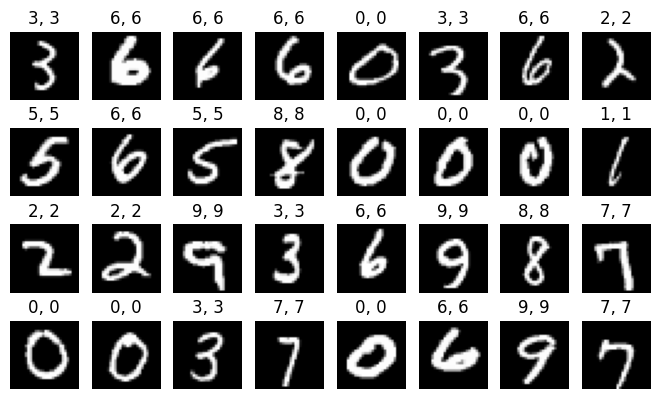

In [ ]:
plt.subplots_adjust(left = 0, right = 1)
for i in range(4*8):
    plt.subplot(4, 8, i + 1)
    plt.title(f'{y_validation.iloc[i]}, {y_pred[i]}')
    plt.imshow(X_validation[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
# Get the confusion matrix of the best model
conf_matrix = confusion_matrix(y_validation, y_pred)

# covert the array to data frame
df_conf_matrix = pd.DataFrame(conf_matrix, index = unique_classes, columns = unique_classes)
df_conf_matrix.index.name = 'True Label'
df_conf_matrix.columns.name = 'Predicted Label'
df_conf_matrix

Predicted Label,0,1,2,3,4,5,6,7,8,9
True Label,,,,,,,,,,
0,1190,0,1,0,1,2,5,1,3,2
1,0,1360,5,3,0,1,3,1,4,2
2,1,1,1143,7,1,0,2,2,8,1
3,0,0,7,1170,0,14,0,2,11,4
4,0,1,2,0,1117,0,8,5,2,18
5,3,0,2,9,2,1040,11,0,5,3
6,2,1,1,0,1,5,1178,0,2,0
7,0,0,6,5,3,0,1,1205,0,8
8,2,1,1,0,0,3,7,0,1174,3


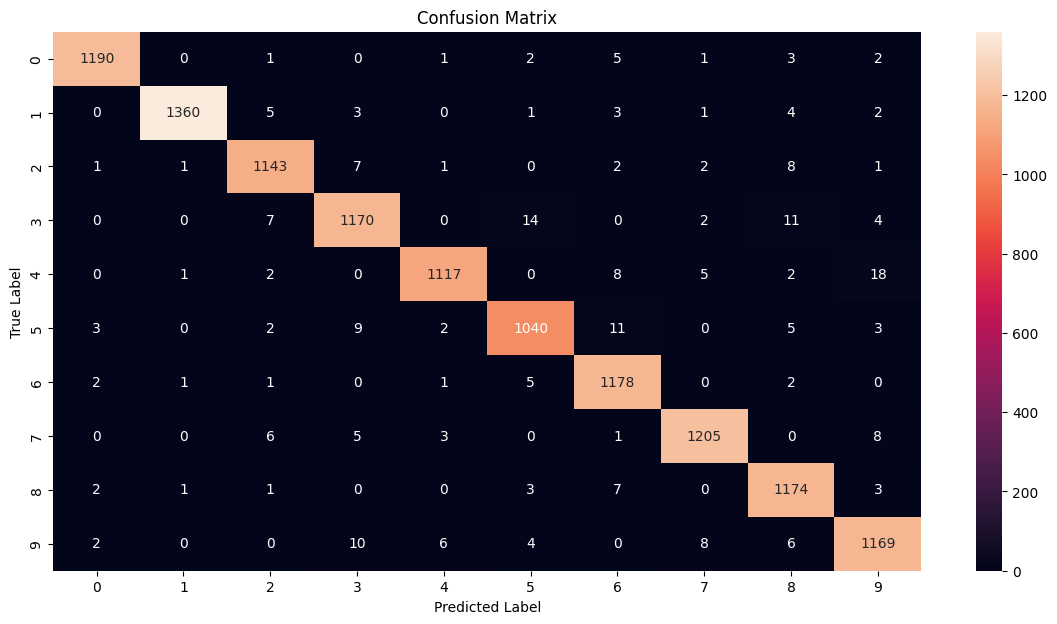

In [ ]:
# plot the best model confusion matrix
plt.figure(figsize = (14,7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

sns.heatmap(df_conf_matrix,
            annot=True, # write the value in the cell
            fmt='d') # to write the value correctly without 'e'

plt.show()

### testing data
Save the best model, then reload it in a separate file, and use it on the testing data loaded from mnist_test.csv.

In [ ]:
import pickle

In [ ]:
# Save the best model.
pickle_out = open('best_model.pickle', 'wb')
pickle.dump(best_model, pickle_out)
pickle_out.close()